# Machine Learning-Used Car Price Predictor-Some Investigations

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine,inspect, func
from config import password
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

import re
import collections
from collections import Counter
import patsy
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn import preprocessing, linear_model, pipeline, metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
% pylab inline

UsageError: Line magic function `%` not found.


In [4]:
con = sqlite3.connect("unnormcleanedcar.sqlite")
df = pd.read_sql_query("SELECT * from unnormalizedcarsdb", con)

In [5]:
df = df[['Price', 'Milage', 'Year', 'Model', 'Car Type']]

In [6]:
df.describe()

,Price,Milage,Year
count,23677.000000,23677.000000,23677.000000
mean,29529.070026,83959.113359,2016.588588
std,17251.225185,63801.946178,3.075055
min,1495.000000,10.000000,1995.000000
25%,16786.000000,37344.000000,2015.000000
50%,25985.000000,69000.000000,2017.000000
75%,38987.000000,116000.000000,2019.000000
max,169800.000000,500000.000000,2021.000000


In [7]:
df.shape

(23677, 5)

#### Created a Dataset X (Indipended Variables) and y (Depended Variable) set for Modeling Linear Regression

In [8]:
sklearn_df=pd.get_dummies(df, columns=['Car Type', 'Model'],drop_first=True)
sklearn_df.head()
df_sk_y=sklearn_df['Price']
df_sk_x=sklearn_df.iloc[:,1:]

#### Split the Data into Test and Train Split using Sklearn

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_sk_x, df_sk_y, test_size=0.3, random_state=100)

#### Fitted the first linear regression model using StatsModels

In [24]:
#OLS MODEL
SM_LinearRegression = sm.OLS(y_train,X_train)
SM_LR_Model=SM_LinearRegression.fit()
SM_LR_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     256.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:29:10   Log-Likelihood:            -1.6650e+05
No. Observations:               16573   AIC:                         3.341e+05
Df Residuals:                   16033   BIC:                         3.383e+05
Df Model:                         539                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Milage                     0.0012      0.001      1.766      0.077      -0.000       0.003
Year                    2432.7231     23.153    105.072      0.000    2387.341    2478.105
Car Type_Alfa          -2.432e+06   2.34e+04   -103.974      0.000   -2.48e+06   -2.39e+06
Car Type_Aston         -2.389e+06   2.33e+04   -102.333      0.000   -2.43e+06   -2.34e+06
Car Type_Audi          -4.649e+06   4.46e+04   -104.174      0.000   -4.74e+06   -4.56e+06
Car Type_BMW           -4.876e+06   4.66e+04   -104.707      0.000   -4.97e+06   -4.78e+06
Car Type_Bentley       -4.021e+06    3.9e+04   -102.978      0.000    -4.1e+06   -3.94e+06
Car Type_Buick         -4.339e+06   4.15e+04   -104.659      0.000   -4.42e+06   -4.26e+06
Car Type_Cadillac       -4.49e+06   4.31e+04   -104.177      0.000   -4.57e+06   -4.41e+06
Car Type_Chevrolet     -4.573e+06   4.38e+04   -104.459      0.000   -4.66e+06   -4.49e+06
Car Type_Chrysler      -4.889e+06   4.82e+04   -101.349      0.000   -4.98e+06   -4.79e+06
Car Type_Dodge          -4.86e+06   4.72e+04   -102.950      0.000   -4.95e+06   -4.77e+06
Car Type_Ferrari       -2.364e+06   2.35e+04   -100.690      0.000   -2.41e+06   -2.32e+06
Car Type_Fiat          -4.074e+06   3.89e+04   -104.708      0.000   -4.15e+06      -4e+06
Car Type_Ford          -4.871e+06   4.69e+04   -103.907      0.000   -4.96e+06   -4.78e+06
Car Type_GMC           -4.575e+06   4.38e+04   -104.397      0.000   -4.66e+06   -4.49e+06
Car Type_Genesis       -3.644e+06   3.51e+04   -103.812      0.000   -3.71e+06   -3.57e+06
Car Type_Honda         -4.552e+06   4.36e+04   -104.513      0.000   -4.64e+06   -4.47e+06
Car Type_Hummer        -3.243e+06    3.1e+04   -104.531      0.000    -3.3e+06   -3.18e+06
Car Type_Hyundai       -4.559e+06   4.36e+04   -104.654      0.000   -4.64e+06   -4.47e+06
Car Type_Infiniti      -4.587e+06   4.39e+04   -104.568      0.000   -4.67e+06    -4.5e+06
Car Type_Jaguar        -4.319e+06   4.15e+04   -104.163      0.000    -4.4e+06   -4.24e+06
Car Type_Jeep           -4.85e+06   4.72e+04   -102.765      0.000   -4.94e+06   -4.76e+06
Car Type_Kia           -4.581e+06   4.38e+04   -104.605      0.000   -4.67e+06   -4.49e+06
Car Type_Lamborghini   -2.374e+06   2.33e+04   -101.971      0.000   -2.42e+06   -2.33e+06
Car Type_Land          -2.427e+06   2.34e+04   -103.920      0.000   -2.47e+06   -2.38e+06
Car Type_Lexus         -4.457e+06   4.28e+04   -104.250      0.000   -4.54e+06   -4.37e+06
Car Type_Lincoln       -4.057e+06   3.89e+04   -104.186      0.000   -4.13e+06   -3.98e+06
Car Type_MINI          -4.883e+06   4.67e+04   -104.520      0.000   -4.97e+06   -4.79e+06
Car Type_Maserati      -3.641e+06    3.5e+04   -104.022      0.000   -3.71e+06   -3.57e+06
Car Type_Mazda          -4.61e+06    4.4e+04   -104.746      0.000    -4.7e+06  

#### Residual Plot (Linear Regression Model)

(array([-40000., -30000., -20000., -10000.,      0.,  10000.,  20000.,
         30000.,  40000.]), <a list of 9 Text yticklabel objects>)

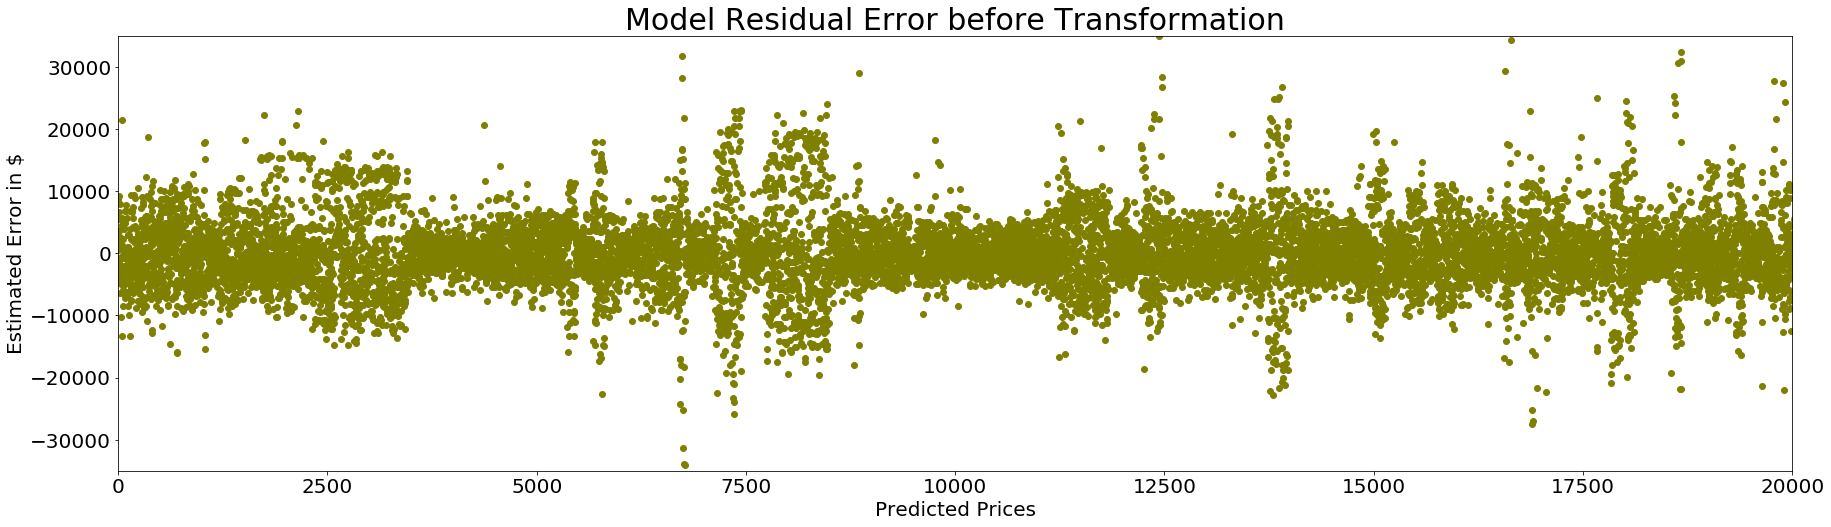

In [164]:
plt.figure(figsize=(15, 4))
plt.subplot(111, facecolor=('white'))
SM_LR_Model.resid.plot(style='o', figsize=(30,8),c=('olive'));
plt.title('Model Residual Error before Transformation',fontsize=30)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Predicted Prices',fontsize=20)
plt.ylim(-35000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('img2_residualError.jpeg')

#### Sklearn Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8959710049501193

#### Test Score

In [27]:
lr.score(X_test,y_test)

0.8666946599522931

#### Lasso Model

Used lasso to identify features high and low impact features

In [128]:
#Declare Alphas for the Lasso Model. 
#Alphas correspond to the penelty for each coef that increases the RMSE.
#Described by the Cost Function
alphas2 = [1e-3, 1e-2, 0, 1e-4]

#### Creaste the Lasso Model

In [129]:
#create the model 
LM_Lasso = linear_model.LassoCV(alphas=alphas2, normalize=True, cv=10)
LM_Lasso

LassoCV(alphas=[0.001, 0.01, 0, 0.0001], copy_X=True, cv=10, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

#### Fit the Lasso Model

In [130]:
#fit the model
LM_Lasso.fit(X_train, y_train)

LassoCV(alphas=[0.001, 0.01, 0, 0.0001], copy_X=True, cv=10, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [131]:
# Score the model. 
LM_Lasso.score(X_test, y_test)

0.8685602994243764

#### High Impact Variables as presented by the lasso model

Text(0.5, 0, 'Features')

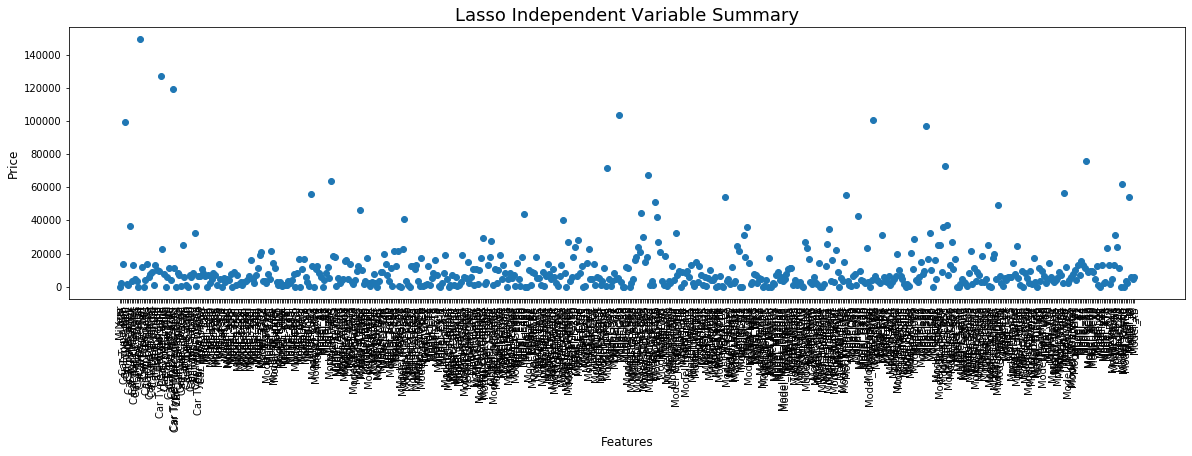

In [132]:
#Visualize the model. See the top influencers
plt.figure(figsize=(20,5))
plt.scatter(np.arange(len(LM_Lasso.coef_)), np.abs(LM_Lasso.coef_))
plt.xticks(np.arange(len(LM_Lasso.coef_)), X_test.columns, rotation=90);
# LM_Lasso.coef_  #See the Coef's
plt.title('Lasso Independent Variable Summary',fontsize=18)
plt.ylabel('Price',fontsize=12)
plt.xlabel('Features',fontsize=12)
# plt.savefig('img4_coef_lasso.jpeg')

#### Depended Variable Distribution

(array([0.0e+00, 5.0e-06, 1.0e-05, 1.5e-05, 2.0e-05, 2.5e-05, 3.0e-05,
        3.5e-05]), <a list of 8 Text yticklabel objects>)

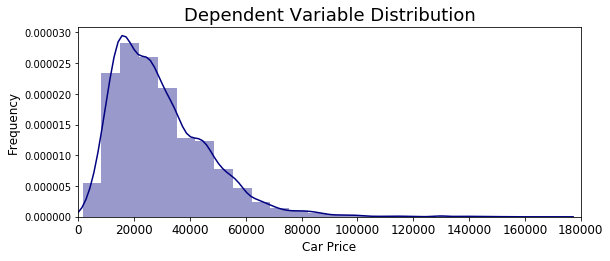

In [136]:
# X_train_sk1, y_train_sk1
plt.figure(figsize=(9, 3.5))
sns.distplot(y_train,bins=25,color='navy')
plt.title('Dependent Variable Distribution',fontsize=18)

plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Car Price',fontsize=12)
plt.xlim(0,180000)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
# plt.savefig('img3_hist1.jpeg')

Right Skewed, needs scaling to achieve normal distribution.

#### Model 2 SK Learn OSL/Pipeline with Preprocessing

In [138]:
from sklearn import pipeline, feature_selection, model_selection, linear_model, preprocessing
# Preprocessing Pipeline
select_pipe = pipeline.Pipeline(
    # some features have missing values so this fills in the mean for them
    # this imputer is lazy and often helpful but not always the best option
    [("imp", preprocessing.Imputer()), 
     # scale our features before linear models. it's good data hygiene 
#      ("std", preprocessing.StandardScaler()),
#      we'll use select k best to adjust model complexity
#      ("select",
#       feature_selection.SelectKBest(
#           score_func=feature_selection.f_regression)), 
     ("lin", linear_model.LinearRegression())
    ])

#### Test Score

In [139]:
select_pipe.fit(X_train,y_train)
select_pipe.score(X_train,y_train)
select_pipe.score(X_test,y_test)

0.8666946599522931

In [140]:
# Intercept
select_pipe.named_steps["lin"].intercept_

-4867768.674767187

In [141]:
predict_y_train=select_pipe.predict(X_train)

#### Residual Error Calculation: actual - predicted (Linear Model SKlearn)

In [142]:
residual_error=y_train - predict_y_train

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 <a list of 7 Text yticklabel objects>)

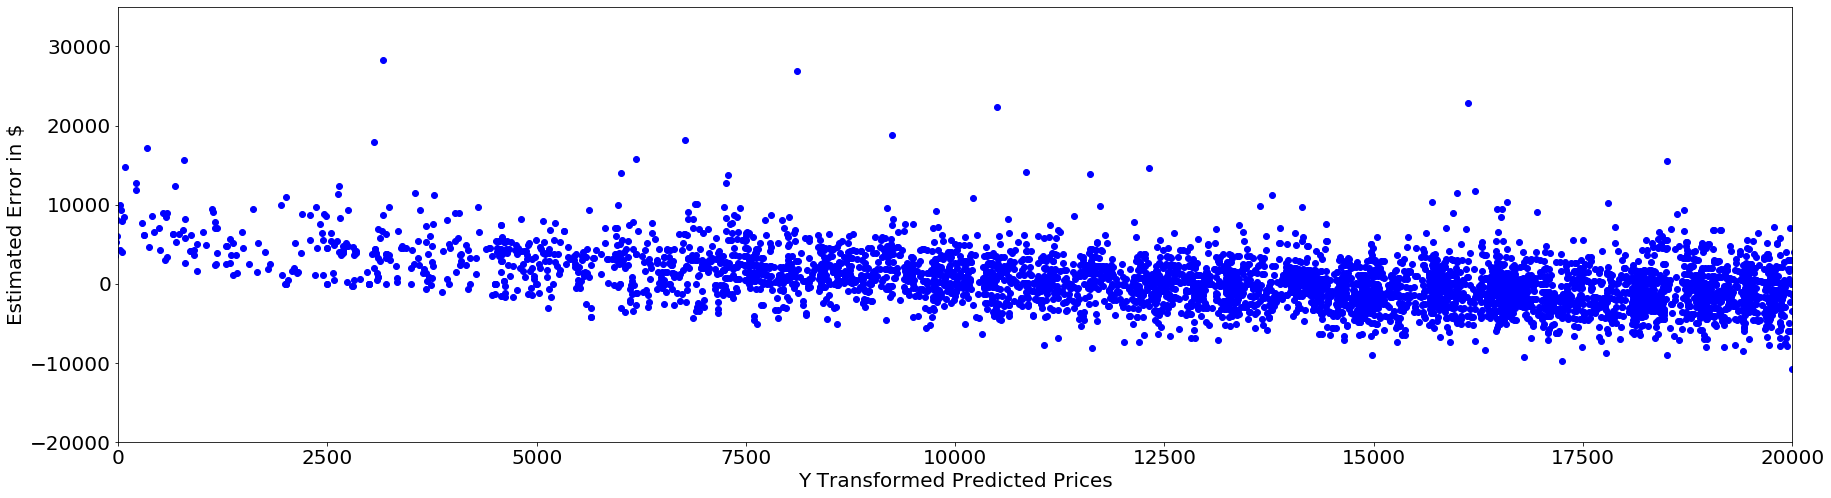

In [165]:
#Visualize the error: 
plt.figure(figsize=(30, 8))
plt.xlim(2000, 20000)  
plt.subplot(facecolor=('white'))
plt.scatter(predict_y_train, residual_error,c='blue')
# plt.title('Model Residual Error after Transformation',fontsize=30)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Y Transformed Predicted Prices',fontsize=20)
plt.ylim(-20000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('img5_Residsklearn.jpeg')

Text(0, 0.5, 'Ordered Values')

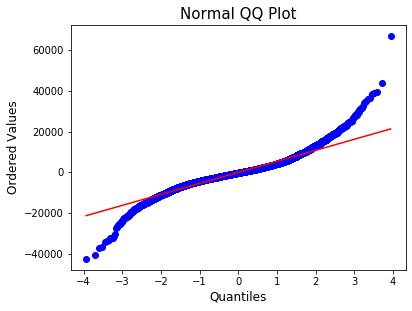

In [144]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual_error, dist="norm", plot=plt)
plt.title('Normal QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=12)
# plt.savefig('img6_QQ1.jpeg')

#### Model 3 Tranformed (Log Transformed Linear Regression Model)

In [147]:
# Was able to achieve a normal bell curve for Y axis, eliminating the right skew. 
# Task : Transform the y
log_y_train=np.log(y_train)
log_y_test=np.log(y_test)

#### Visualize Y Transformed Distribution:

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text yticklabel objects>)

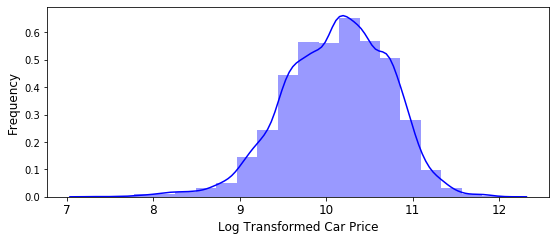

In [148]:
#Dist plot is a combination of Histogram and PMF combined. 
plt.figure(figsize=(9, 3.5))
sns.distplot(log_y_train,bins=20,color='blue')
# plt.title('Log Transformed Y Distribution',fontsize=18)

plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Log Transformed Car Price',fontsize=12)
# plt.xlim(0,80000)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
# plt.savefig('img7_hist_transformed.jpeg')

#### Model The Y Transformed using the Pipeline

In [149]:
model_log = select_pipe.fit(X_train,log_y_train)
model_log.score(X_train,log_y_train)

0.9290507596228872

#### Score y-trasformed model using the testing data

In [150]:
model_log.score(X_test,log_y_test)

0.907976751437734

In [151]:
# Check the new intercept: 
model_log.named_steps["lin"].intercept_

-173.66403411403522

#### Backtransfrom to see the new Residual Error Log

In [155]:
#Step 1: Predict the new log y
y_pred_log_test=model_log.predict(X_test)
#Step 2: Exponentiate the results. 
y_pred_log_test_exp=np.exp(y_pred_log_test)
#Step 3: Subtract Actual - Predicted Y
res_error_log_transformed = y_test -  y_pred_log_test_exp
#Step 4: Plot it. transformed/exp y on x-axis and residual on y-axis.

#### Plot the New Residual Error:

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 <a list of 7 Text yticklabel objects>)

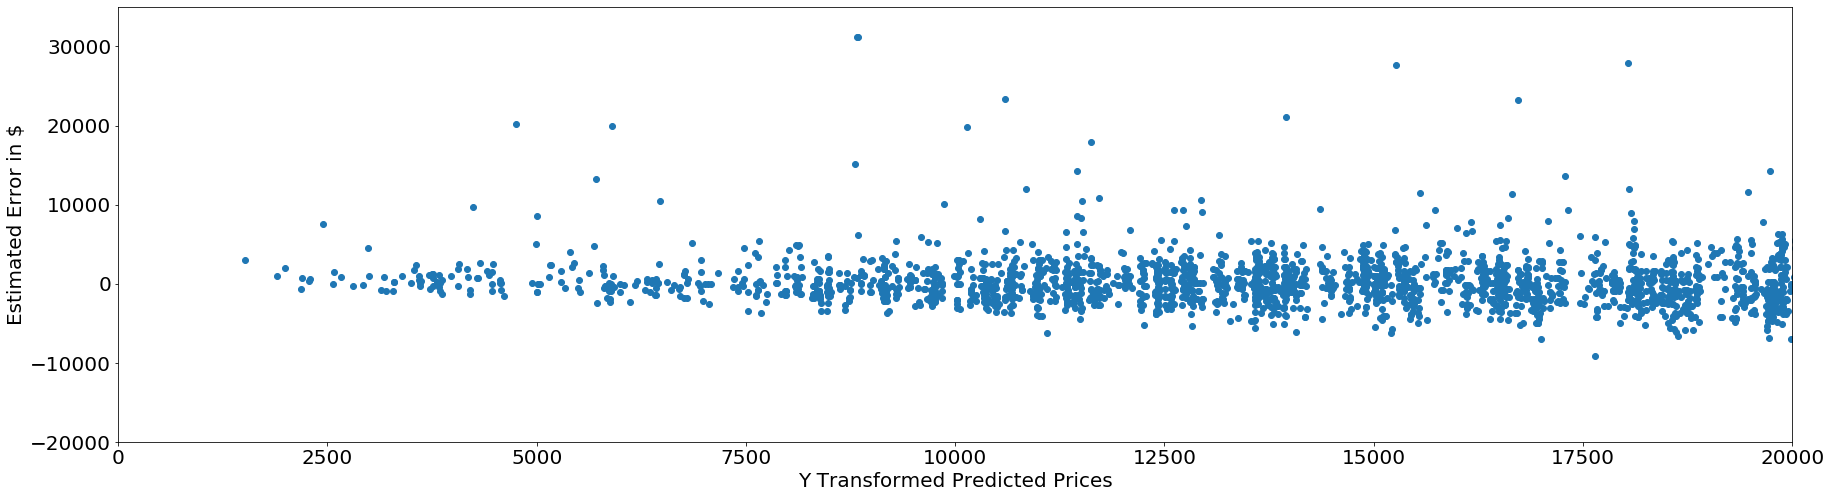

In [156]:
plt.figure(figsize=(30, 8))
plt.scatter(y_pred_log_test_exp,res_error_log_transformed)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Y Transformed Predicted Prices',fontsize=20)
plt.ylim(-20000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('img8_ResidPretransformed.jpeg')
#As Seen in the figure below. The error has imporved drastically.

#### Model 3 Backtransformed Score

In [157]:
# train_score_transformed=metrics.r2_score(y_train,exp(y_pred_log_train))
test_score_transformed=metrics.r2_score(y_test,y_pred_log_test_exp)
print(test_score_transformed)

0.8785708260425223


In [158]:
residual_error_log_test=log_y_test - y_pred_log_test

#### Visualize the Log trasnformed Distribution QQ plot for residual Errors:

Text(0, 0.5, 'Ordered Values')

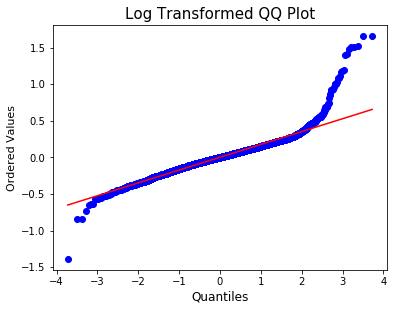

In [159]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual_error_log_test, dist="norm", plot=plt)
plt.title('Log Transformed QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=11)

# plt.savefig('img_9_qq2_transformed.jpeg')

### Decision Tree Model

#### Model The Y Transformed using Decsion tree

In [178]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(X_train, log_y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [179]:
dt.score(X_train,log_y_train)

0.999782757212507

#### Score y-trasformed Decision Tree model using the testing data

In [180]:
dt.score(X_test,log_y_test)

0.8464743161285552

#### Backtransfrom to see the new Residual Error Log

In [192]:
#Step 1: Predict the new log y
y_pred_log_testdt=dt.predict(X_test)
#Step 2: Exponentiate the results. 
y_pred_log_test_expdt=np.exp(y_pred_log_test)
#Step 3: Subtract Actual - Predicted Y
res_error_log_transformeddt = y_test -  y_pred_log_test_exp
#Step 4: Plot it. transformed/exp y on x-axis and residual on y-axis.

#### Plot the New Residual Error:

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 <a list of 7 Text yticklabel objects>)

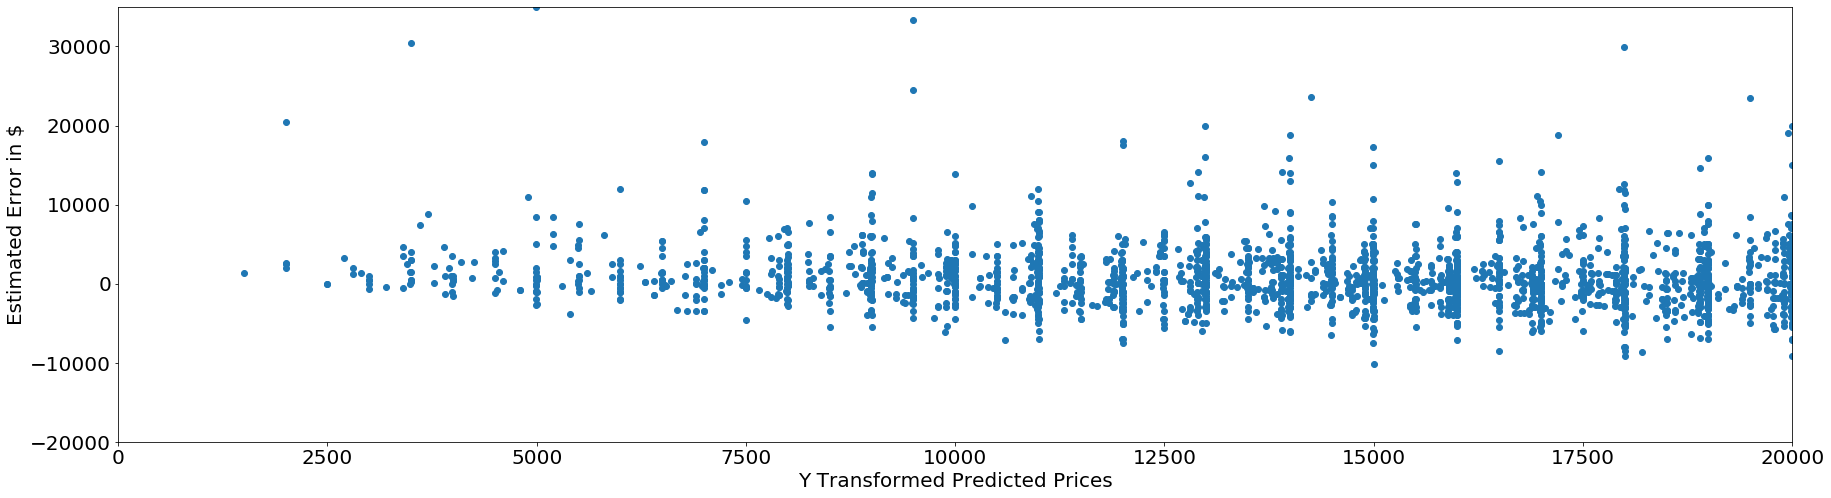

In [183]:
plt.figure(figsize=(30, 8))
plt.scatter(y_pred_log_test_expdt,res_error_log_transformeddt)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Y Transformed Predicted Prices',fontsize=20)
plt.ylim(-20000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


#### Decision Tree Model Backtransformed Score

In [184]:
# train_score_transformed=metrics.r2_score(y_train,exp(y_pred_log_train))
test_score_transformeddt=metrics.r2_score(y_test,y_pred_log_test_expdt)
print(test_score_transformeddt)

0.8186148943328181


In [185]:
residual_error_log_test=log_y_test - y_pred_log_testdt

#### Visualize the Log trasnformed Distribution QQ plot for residual Errors for Decision tree Model:

Text(0, 0.5, 'Ordered Values')

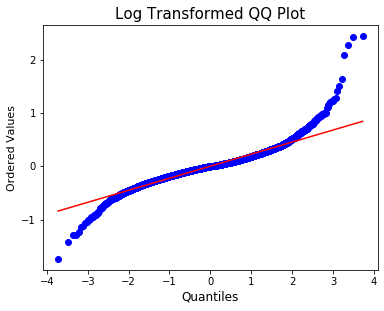

In [186]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual_error_log_test, dist="norm", plot=plt)
plt.title('Log Transformed QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=11)

### Random Forest Model

#### Model The Y Transformed using Decsion tree

In [187]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, log_y_train) 

C:\Users\Kaveh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [188]:
rf.score(X_train,log_y_train)

0.984630381548132

#### Score y-trasformed Random Forest model using the testing data


In [189]:
rf.score(X_test,log_y_test)

0.8878395314565619

#### Backtransfrom to see the new Residual Error Log

In [190]:
#Step 1: Predict the new log y
y_pred_log_testrf=dt.predict(X_test)
#Step 2: Exponentiate the results. 
y_pred_log_test_exprf=np.exp(y_pred_log_test)
#Step 3: Subtract Actual - Predicted Y
res_error_log_transformedrf = y_test -  y_pred_log_test_exp
#Step 4: Plot it. transformed/exp y on x-axis and residual on y-axis.

#### Plot the New Residual Error:

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 <a list of 7 Text yticklabel objects>)

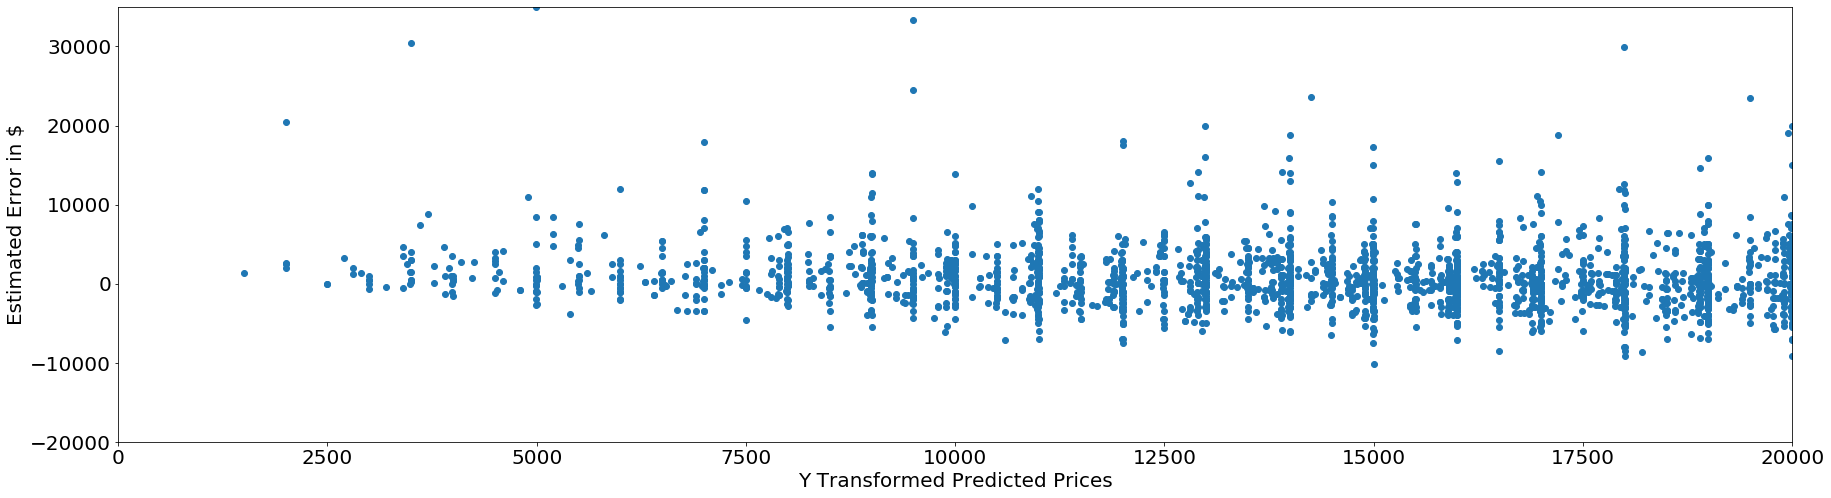

In [191]:
plt.figure(figsize=(30, 8))
plt.scatter(y_pred_log_test_exprf,res_error_log_transformedrf)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Y Transformed Predicted Prices',fontsize=20)
plt.ylim(-20000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#### Random Forest Model Backtransformed Score

In [ ]:
# train_score_transformed=metrics.r2_score(y_train,exp(y_pred_log_train))
test_score_transformedrf=metrics.r2_score(y_test,y_pred_log_test_exprf)
print(test_score_transformedrf)

In [ ]:
residual_error_log_testrf=log_y_testrf - y_pred_log_testrf

#### Visualize the Log trasnformed Distribution QQ plot for residual Errors for Random Forest Model:

In [ ]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual_error_log_testrf, dist="norm", plot=plt)
plt.title('Log Transformed QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=11)